In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
df = pd.read_excel('Online Retail.xlsx')

In [60]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [63]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [65]:
print(df.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France  


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [69]:
# Missing data 
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [71]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool


### Explore Sales Metrics

#### - Calculate total revenue
#### - Determine unique values(customers, products, and transactions)

In [80]:
# Add a 'Revenue' column

df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Calculate total revenue 

total_revenue = df['Revenue'].sum()

# Display total revenue
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $9747747.93


In [82]:
# Calculate key metrics

unique_customers = df['CustomerID'].nunique()
unique_products = df['StockCode'].nunique()
total_transactions = df['InvoiceNo'].nunique()

# Display results
print("Total Revenue:", total_revenue)
print("Unique Customer:", unique_customers)
print("Unique Products:", unique_products)
print("Total Transactions:", total_transactions)

Total Revenue: 9747747.933999998
Unique Customer: 4372
Unique Products: 4070
Total Transactions: 25900


In [84]:
# The indexing of the unique customer

customer_row = df.iloc[4372]

print(customer_row)

InvoiceNo                               536769
StockCode                                22661
Description    CHARLOTTE BAG DOLLY GIRL DESIGN
Quantity                                    10
InvoiceDate                2010-12-02 14:47:00
UnitPrice                                 0.85
CustomerID                             17581.0
Country                         United Kingdom
Revenue                                    8.5
Name: 4372, dtype: object


### Analyze Product Popularity

In [87]:
# Group by 'Description' to find the most popular products

popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Display top 10 products

print("Top 10 Popular products:")
print(popular_products)

Top 10 Popular products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


### Analyze Revenue Contributions by Country 

In [90]:
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Display top 10 countries by revenue

print("Top 10 Countries by Revenue:")
print(country_sales)

Top 10 Countries by Revenue:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64


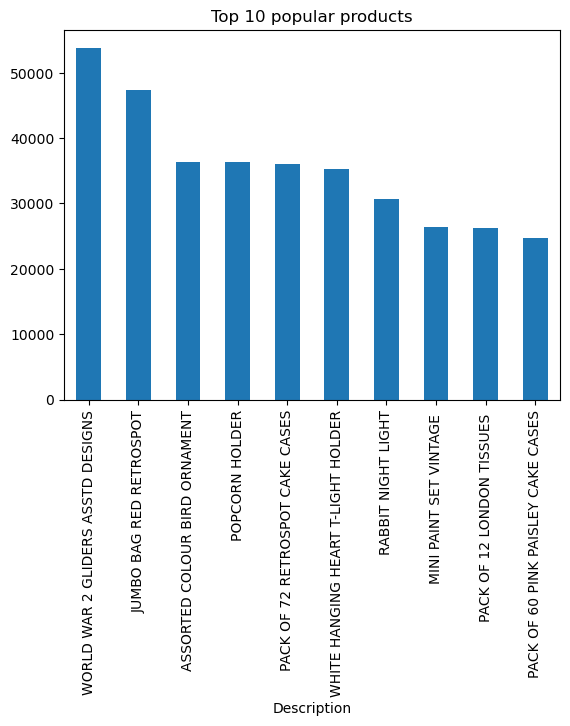

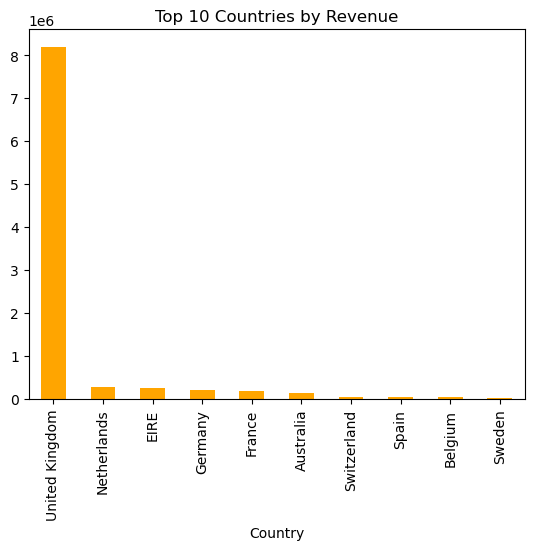

In [92]:
# Top 10 popular products

popular_products.plot(kind='bar', title = 'Top 10 popular products')
plt.ylabel = ('Quantity Sold')
plt.xlabel = ('Products')
plt.show()

country_sales.plot(kind='bar', title = 'Top 10 Countries by Revenue', color= 'orange')
plt.ylabel = ('Revenue')
plt.xlabel = ('Country')
plt.show()
